In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv("E:/Data/Titanic_Data.csv")

In [3]:
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Embarked - Southampton(S) [UK] on 10 April 1912, Titanic called at Cherbourg(C) in France and Queenstown (Q) in Ireland, before heading west to New York.

#### Data Wrangling

In [5]:
# Count of missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.shape

(891, 12)

#### EDA - Exploratory Data Analysis

    * Most of the passengers travelling in Pclass = 3 in the Titanic Ship.

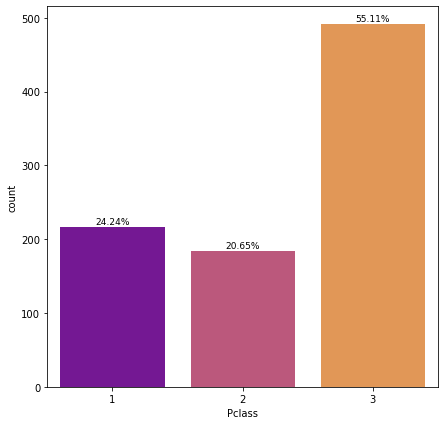

In [9]:
plt.figure(figsize = (7,7))
fig = sns.countplot(x = 'Pclass', data = titanic_df, palette='plasma')
sizes = []
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height + 4, 
            '{:1.2f}%'.format(height/len(titanic_df)* 100), ha = 'center', fontsize = 9)

    * Distribution of Survived and Not Survived - 61.62 % of Total Passengers Lost their life in Titanic Ship

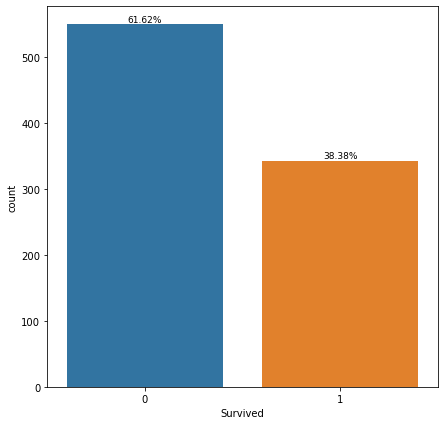

In [10]:
plt.figure(figsize = (7,7))
fig = sns.countplot(x = 'Survived', data = titanic_df)
sizes = []
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height + 4, 
            '{:1.2f}%'.format(height/len(titanic_df)* 100), ha = 'center', fontsize = 9)

    * Distribution of Gender - 64.76 % of Total Passengers are male and 35.24 % are female.

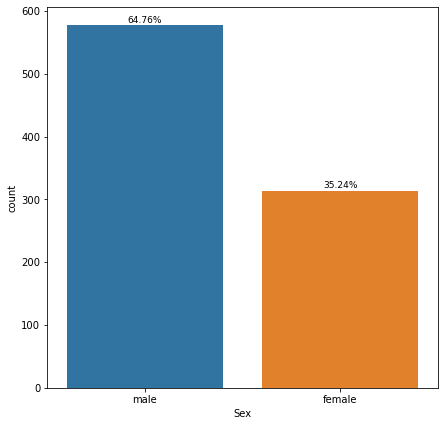

In [11]:
plt.figure(figsize = (7,7))
fig = sns.countplot(x = 'Sex', data = titanic_df)
sizes = []
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height + 4, 
            '{:1.2f}%'.format(height/len(titanic_df)* 100), ha = 'center', fontsize = 9)

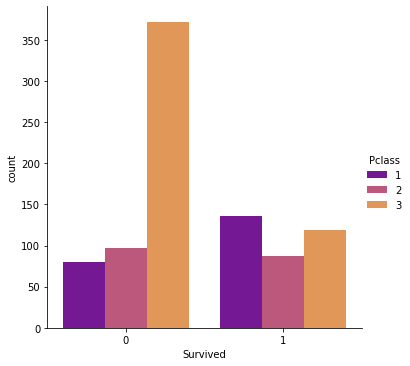

In [15]:
sns.catplot(x = 'Survived', kind = 'count', hue = 'Pclass', data = titanic_df, palette = 'plasma')

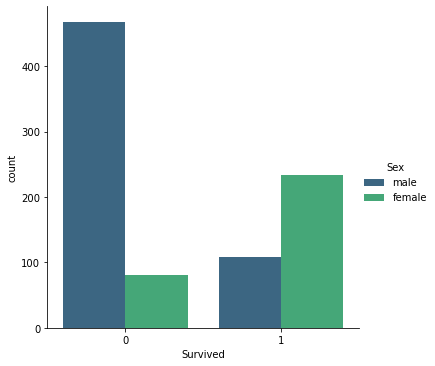

In [19]:
# Most of the passenger survived are Feamle 
sns.catplot(x = 'Survived', kind = 'count', hue = 'Sex', data = titanic_df, palette = 'viridis')

In [20]:
# crosstab 
contingency_table = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


#### Handling Missing Values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

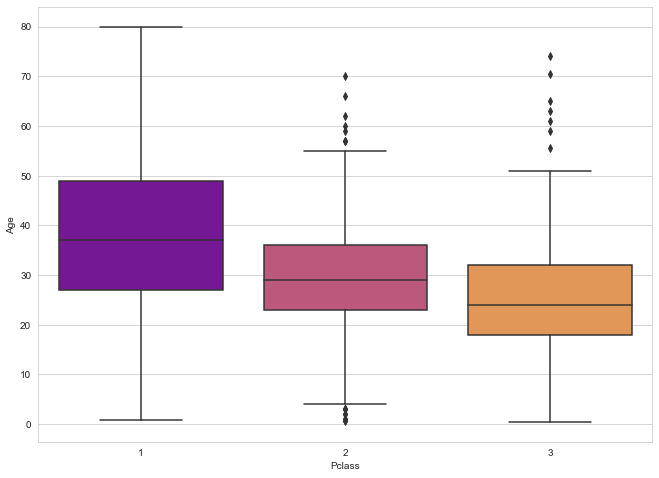

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize = (11,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df, palette='plasma')

In [23]:
# Alternative approach to Replace Missing Age by Title of Name
titanic_df['Title'] = titanic_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [24]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [25]:
pd.crosstab(titanic_df['Title'], titanic_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
titanic_df['Title'] = titanic_df['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col', 'Capt','Countess','Jonkheer'],
                                                 'Rare')

In [27]:
titanic_df['Title'] = titanic_df['Title'].replace('Mlle','Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms','Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme','Mrs')

In [28]:
titanic_df[['Title','Age']].groupby(['Title']).median()

,Age
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Rare,48.5


In [29]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


#### UDF - Simple Imputer
    * Replacing missing value with median

In [30]:
def imputer_age(cols):
    Age = cols[0]
    Title = cols[1]
    if pd.isnull(Age):
        if Title == 'Master':
            return 3.5
        elif Title == 'Miss':
            return 21
        elif Title == 'Mr':
            return 30
        elif Title == 'Mrs':
            return 35
        else:
            return 48.5
    else:
        return Age

In [31]:
titanic_df['Age'] = titanic_df[['Age','Title']].apply(imputer_age, axis = 1)

In [32]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [33]:
# Drop Cabin
titanic_df.drop('Cabin', axis = 1, inplace=True)

In [34]:
# It will drop two rows of Embardked Column Missing
titanic_df.dropna(inplace=True)

In [35]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [37]:
titanic_df.shape

(889, 12)

#### Data Preprocessing

In [41]:
# One Hot Encoding
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [43]:
embarked = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [44]:
title = pd.get_dummies(titanic_df['Title'], drop_first=True)

In [47]:
titanic_df1 = pd.concat([titanic_df, sex, embarked, title], axis = 1)
titanic_df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S,Miss,Mr,Mrs,Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rare,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,0,0,1,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,Miss,0,0,1,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,1,0,0,0,1,0,0


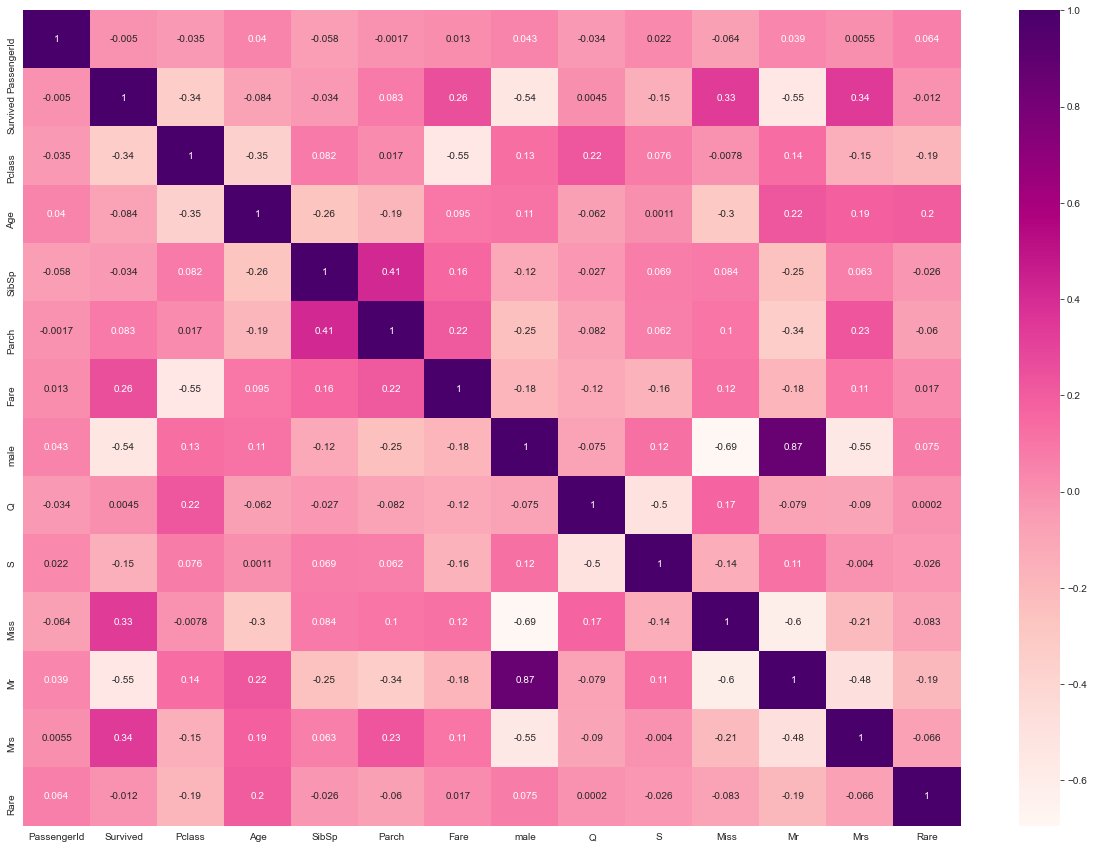

In [48]:
plt.figure(figsize=(21,15))
sns.heatmap(titanic_df1.corr(), annot=True, cmap='RdPu')
plt.show()

#### Features & Target

In [49]:
X = titanic_df1.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Embarked', 'Title'], axis = 1)
Y = titanic_df1['Survived']

#### Cross-Validation
    * Splitting Data into train & test samples

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#### Linear Regression

In [92]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'lbfgs', C = 1e5, max_iter=1e7, penalty='l2')

In [93]:
logit_model.fit(x_train, y_train)

LogisticRegression(C=100000.0, max_iter=10000000.0)

In [94]:
# Accuracy 
logit_model.score(x_test, y_test)

0.848314606741573

#### Classification Metrics
    * Confusion Matrix
    * Classification Report

In [95]:
predictions = logit_model.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[93, 12],
       [15, 58]], dtype=int64)

<AxesSubplot:>

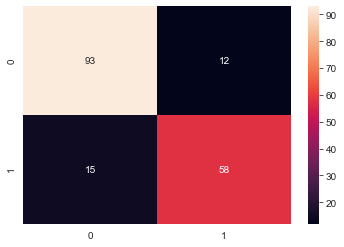

In [99]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = '0.0f')

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.79      0.81        73

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



#### Make New Predictions

In [101]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Rare
0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,0,0,1,1,0,0,0
888,3,21.0,1,2,23.4500,0,0,1,1,0,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,1,0,0


In [102]:
# 
x_jack = [[3, 22.0, 0, 0, 7.920, 1, 0, 1, 0, 1, 0, 0]]
x_rose = [[1, 24.0, 1, 2, 72.920, 0, 0, 1, 1, 0, 0, 0]]

In [103]:
logit_model.predict(x_jack)

array([0], dtype=int64)

In [104]:
logit_model.predict(x_rose)

array([1], dtype=int64)